In [69]:
import numpy as nu
import math as mat
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline 

nose=0.2
nu.random.seed(0)

In [83]:
def cos(x):
    return nu.cos(x)
def cos_n(x):
    return nu.cos(x)+nose*nu.cos(x)*(2*nu.random.random(len(x))-1)
def exp(x):
    return nu.exp(x)
def exp_n(x):
    return nu.exp(x)+nose*nu.cos(x)*(2*nu.random.random(len(x))-1)

In [84]:
cos(10)
exp(0)

1.0

In [85]:
#prepare data
n_samples=20
x=nu.sort(nu.random.rand(n_samples)*mat.pi)
y1=cos_n(x)
y2=exp_n(x)

#y1.reshape(1,-1)
#x.reshape(1,-1)
degrees=range(1,15)
mse=[]

PolynomialFeatures(degree=1, include_bias=False, interaction_only=False)
PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)
PolynomialFeatures(degree=3, include_bias=False, interaction_only=False)
PolynomialFeatures(degree=4, include_bias=False, interaction_only=False)
PolynomialFeatures(degree=5, include_bias=False, interaction_only=False)
PolynomialFeatures(degree=6, include_bias=False, interaction_only=False)
PolynomialFeatures(degree=7, include_bias=False, interaction_only=False)
PolynomialFeatures(degree=8, include_bias=False, interaction_only=False)
PolynomialFeatures(degree=9, include_bias=False, interaction_only=False)
PolynomialFeatures(degree=10, include_bias=False, interaction_only=False)
PolynomialFeatures(degree=11, include_bias=False, interaction_only=False)
PolynomialFeatures(degree=12, include_bias=False, interaction_only=False)
PolynomialFeatures(degree=13, include_bias=False, interaction_only=False)
PolynomialFeatures(degree=14, include_bias=Fals

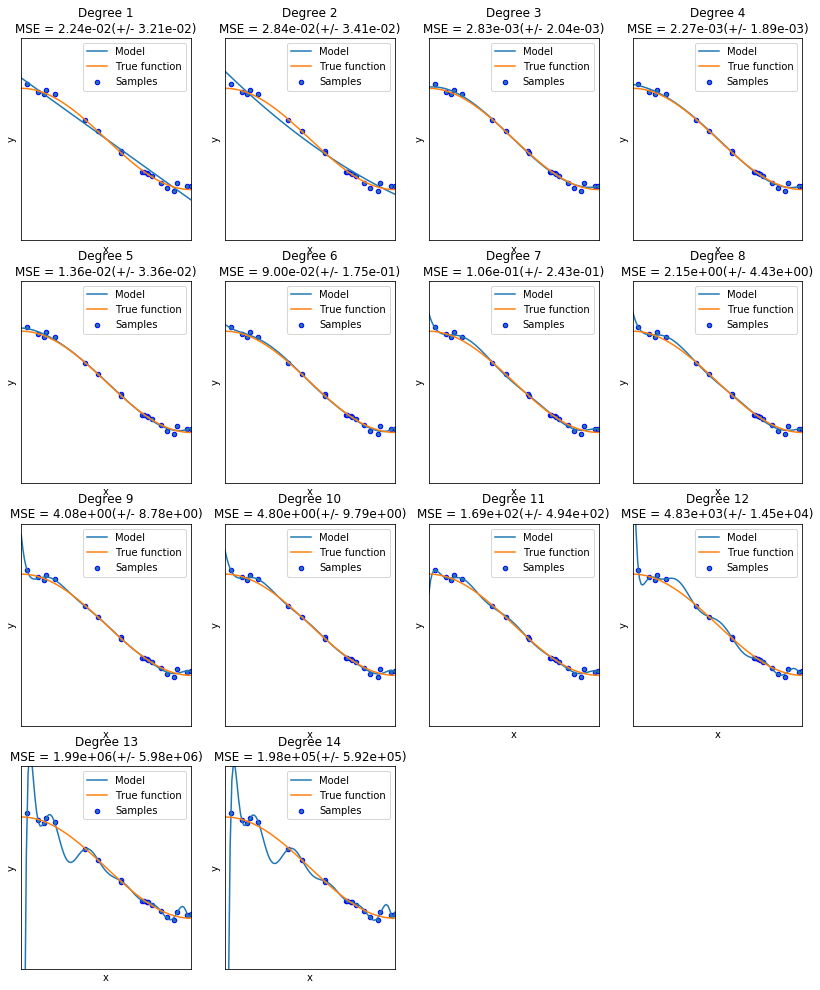

[0.022374271780672778, 0.028382095257750956, 0.0028300664626174929, 0.0022734861628342321, 0.013556178079652431, 0.090041467503234912, 0.10606328069413136, 2.1490912071980737, 4.0817493765226338, 4.7974814656209004, 169.07807796175814, 4827.3792568207527, 1994576.1356330351, 197686.74349976971, 0.022374271780672778, 0.028382095257750956, 0.0028300664626174929, 0.0022734861628342321, 0.013556178079652431, 0.090041467503234912, 0.10606328069413136, 2.1490912071980737, 4.0817493765226338, 4.7974814656209004, 169.07807796175814, 4827.3792568207527, 1994576.1356330351, 197686.74349976971]


In [92]:
#fit polynomial
#degrees=[1,3,8]
plt.figure(figsize=(14, 7*5))
for i in range(len(degrees)):
    ax = plt.subplot(8, 4, i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),("linear_regression", linear_regression)])
    print(polynomial_features)
    pipeline.fit(x[:, nu.newaxis], y1)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, x[:,nu.newaxis], y1, scoring="neg_mean_squared_error", cv=10)

    X_test = nu.linspace(0, mat.pi, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, nu.newaxis]), label="Model")
    plt.plot(X_test, cos(X_test), label="True function")
    plt.scatter(x[:,nu.newaxis], y1, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, mat.pi))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))
    mse.append(-scores.mean())
plt.show()
#print(mse)

Text(0,0.5,'mse')

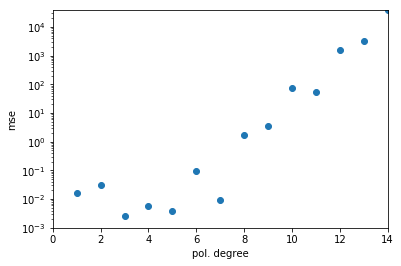

In [94]:
plt.scatter(degrees,mse)
plt.yscale('log')
plt.axis([0, len(degrees), 1/1000, max(mse)])
plt.xlabel('pol. degree')
plt.ylabel('mse')

PolynomialFeatures(degree=1, include_bias=False, interaction_only=False)
PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)
PolynomialFeatures(degree=3, include_bias=False, interaction_only=False)
PolynomialFeatures(degree=4, include_bias=False, interaction_only=False)
PolynomialFeatures(degree=5, include_bias=False, interaction_only=False)
PolynomialFeatures(degree=6, include_bias=False, interaction_only=False)
PolynomialFeatures(degree=7, include_bias=False, interaction_only=False)
PolynomialFeatures(degree=8, include_bias=False, interaction_only=False)
PolynomialFeatures(degree=9, include_bias=False, interaction_only=False)
PolynomialFeatures(degree=10, include_bias=False, interaction_only=False)
PolynomialFeatures(degree=11, include_bias=False, interaction_only=False)
PolynomialFeatures(degree=12, include_bias=False, interaction_only=False)
PolynomialFeatures(degree=13, include_bias=False, interaction_only=False)
PolynomialFeatures(degree=14, include_bias=Fals

PolynomialFeatures(degree=7, include_bias=False, interaction_only=False)
PolynomialFeatures(degree=8, include_bias=False, interaction_only=False)
PolynomialFeatures(degree=9, include_bias=False, interaction_only=False)
PolynomialFeatures(degree=10, include_bias=False, interaction_only=False)
PolynomialFeatures(degree=11, include_bias=False, interaction_only=False)
PolynomialFeatures(degree=12, include_bias=False, interaction_only=False)
PolynomialFeatures(degree=13, include_bias=False, interaction_only=False)
PolynomialFeatures(degree=14, include_bias=False, interaction_only=False)


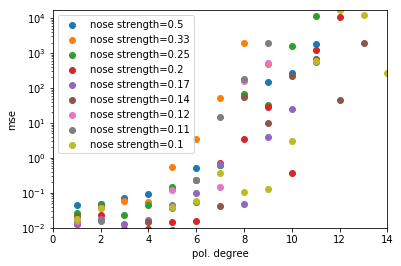

In [99]:
for n in range(1,10):
    nose=1/(n+1)
    x=nu.sort(nu.random.rand(n_samples)*mat.pi)
    y1=cos_n(x)
    mse=[]
    for i in range(len(degrees)):
        #ax = plt.subplot(8, 4, i + 1)
        #plt.setp(ax, xticks=(), yticks=())
        polynomial_features = PolynomialFeatures(degree=degrees[i],
                                                include_bias=False)
        linear_regression = LinearRegression()
        pipeline = Pipeline([("polynomial_features", polynomial_features),("linear_regression", linear_regression)])
        print(polynomial_features)
        pipeline.fit(x[:, nu.newaxis], y1)
    # Evaluate the models using crossvalidation
        scores = cross_val_score(pipeline, x[:,nu.newaxis], y1, scoring="neg_mean_squared_error", cv=10)
        X_test = nu.linspace(0, mat.pi, 100)
        mse.append(-scores.mean())

    etykieta='nose strength='+str(round(nose,2))
    plt.scatter(degrees,mse,label=etykieta)
    plt.yscale('log')
    plt.axis([0, len(degrees), 1/100, max(mse)])

plt.xlabel('pol. degree')
plt.ylabel('mse')
plt.legend()